# Marketing Performance & Efficiency Analysis

<img src="https://github.com/AvaWhitney/marketing-campaign-performance/blob/main/media/marketing_img.jpeg?raw=true">

# Introduction

This project analyzes a synthetic dataset simulating real-world marketing scenarios, with the goal of uncovering patterns that can inform more effective budgeting, positioning, and discount strategies. The dataset, sourced from Kaggle, contains detailed campaign-level information across key performance metrics, customer characteristics, and promotional strategies.

The analysis focuses on answering core business questions relevant to marketing and product performance:

* How do budget levels, discount strategies, and campaign positioning (keywords) impact performance metrics like ROI and revenue efficiency?
* Are there identifiable patterns between clicks, conversions, and revenue outcomes?
* Which combinations of positioning, discounting, and budgeting deliver the most efficient returns?

Through systematic data exploration and targeted analysis, this project identifies strategies that maximize revenue efficiency (revenue per dollar spent), ROI, and conversion effectiveness. The insights generated are designed to be directly actionable for guiding future marketing investments and campaign design decisions.

## &nbsp;&nbsp;&nbsp;&nbsp; Data Dictionary

| **Column Name**                  | **Description**                                                                                 |
|----------------------------------|---------------------------------------------------------------------------------------------------|
| **Campaign_ID**                  | Unique identifier for each marketing campaign (e.g., `CMP123`).                |
| **Product_ID**                   | Unique identifier for each product (e.g., `PROD456`).                          |
| **Budget**                       | Campaign budget in USD (ranges between 500 and 50,000).                      |
| **Clicks**                       | Number of clicks the campaign generated.                                       |
| **Conversions**                  | Number of successful conversions from the campaign.                            |
| **Revenue_Generated**            | Total revenue generated by the campaign in USD.                                |
| **ROI**                          | Return on Investment (ratio of revenue to budget).                             |
| **Customer_ID**                  | Unique identifier for each customer (e.g., `CUST789`).                         |
| **Subscription_Tier**            | Customer's subscription level: Basic, Standard, or Premium.                    |
| **Subscription_Length**          | Length of customer subscription in months (1–36).                              |
| **Flash_Sale_ID**                | Unique identifier for flash sales associated with the campaign.                |
| **Discount_Level**               | Discount percentage offered during the campaign (10–70%).                      |
| **Units_Sold**                   | Total units sold as a result of the campaign.                                   |
| **Bundle_ID**                    | Unique identifier for product bundles sold in the campaign.                    |
| **Bundle_Price**                 | Price of the product bundle in USD (ranges between 50 and 500).              |
| **Customer_Satisfaction_Post_Refund** | Customer satisfaction score after refunds, on a scale of 1 to 5.               |
| **Common_Keywords**              | Descriptive keywords associated with the campaign (e.g., Affordable, Durable).      |
| **Budget_Category**              |Ranges of Low (0 - 9,999), Medium (10,000 - 24,999), High (25,000 - 39,999), Very High (40,000 - max) |
| **Discount_Category**            |Categories of Low (0 - 20%), Medium (21 - 40%), High (41 - 60%), Very High (61 - max)                 |
| **Bundle_Price_Category**        |Ranges of Low (0 - 149), Medium (150 - 299), High (300 - 449), Very High (450 - max)          |
| **Revenue_per_Dollar**           |Revenue_Generated / Budget                                                           |
| **Conversion_Rate**              |Conversions / Clicks                                                                 |

#### Data Source: [Kaggle](https://www.kaggle.com/datasets/imranalishahh/marketing-and-product-performance-dataset/data)

# Table of Contents

### 1. Introduction
#####    &nbsp;&nbsp;&nbsp;&nbsp; 1.1 Data Overview & Dictionary <br>

### 2. Data Preparation
#####   &nbsp;&nbsp;&nbsp;&nbsp; 2.1 Import Libraries & Dataset
#####   &nbsp;&nbsp;&nbsp;&nbsp; 2.2 Initial Data Inspection
#####   &nbsp;&nbsp;&nbsp;&nbsp; 2.3 Data Cleaning 
#####   &nbsp;&nbsp;&nbsp;&nbsp; 2.4 Section Insights  <br>

### 3. Dataset Overview & Initial Exploration
#####   &nbsp;&nbsp;&nbsp;&nbsp; 3.1 Dataset Summary & Distribution Exploration
#####   &nbsp;&nbsp;&nbsp;&nbsp; 3.2 Section Insights  <br>

### 4. Focused Analysis & Insights
#####   &nbsp;&nbsp;&nbsp;&nbsp; 4.1 Pricing Strategy Insights
#####   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.1.1 Preliminary Findings
#####   &nbsp;&nbsp;&nbsp;&nbsp; 4.2 Customer Segmentation Insights
#####   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.2.1 Preliminary Findings
#####   &nbsp;&nbsp;&nbsp;&nbsp; 4.3 Keyword Positioning Insights
#####   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.3.1 Preliminary Findings
#####   &nbsp;&nbsp;&nbsp;&nbsp; 4.4 Campaign Engagement Efficiency Insights
#####   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4.4.1 Preliminary Findings <br>

### 6. Conclusion & Recommendations
#####   &nbsp;&nbsp;&nbsp;&nbsp; 5.1 Key Findings
#####   &nbsp;&nbsp;&nbsp;&nbsp; 5.2 Recommended Actions
#####   &nbsp;&nbsp;&nbsp;&nbsp; 5.3 Limitations & Considerations

# 2. Data Preparation

The objective of this section is to ensure the dataset is clean, consistent, and well-structured for analysis. This involves verifying data integrity and if needed, creating additional columns that will enable more meaningful comparisons throughout the analysis

## &nbsp;&nbsp;&nbsp;&nbsp; 2.1 Import Libraries & Dataset

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [7]:
df = pd.read_csv("./Datasets/marketing_and_product_performance.csv")
df.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


## &nbsp;&nbsp;&nbsp;&nbsp; 2.2 Initial Data Inspection

In [15]:
# Looking for missing values
df.isnull().sum()

Campaign_ID                          0
Product_ID                           0
Budget                               0
Clicks                               0
Conversions                          0
Revenue_Generated                    0
ROI                                  0
Customer_ID                          0
Subscription_Tier                    0
Subscription_Length                  0
Flash_Sale_ID                        0
Discount_Level                       0
Units_Sold                           0
Bundle_ID                            0
Bundle_Price                         0
Customer_Satisfaction_Post_Refund    0
Common_Keywords                      0
dtype: int64

In [19]:
# Looking for duplicates
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Campaign_ID                        10000 non-null  object 
 1   Product_ID                         10000 non-null  object 
 2   Budget                             10000 non-null  float64
 3   Clicks                             10000 non-null  int64  
 4   Conversions                        10000 non-null  int64  
 5   Revenue_Generated                  10000 non-null  float64
 6   ROI                                10000 non-null  float64
 7   Customer_ID                        10000 non-null  object 
 8   Subscription_Tier                  10000 non-null  object 
 9   Subscription_Length                10000 non-null  int64  
 10  Flash_Sale_ID                      10000 non-null  object 
 11  Discount_Level                     10000 non-null  int6

In [35]:
df.describe()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25263.607524,2481.903600,498.978700,50038.627579,2.756365,18.016500,39.421000,100.689600,275.198346,2.500900
std,14350.085927,1435.973623,289.479495,28545.702337,1.296901,10.149666,17.212925,57.074015,129.218710,1.113249
min,500.440000,10.000000,1.000000,1002.080000,0.500000,1.000000,10.000000,1.000000,50.010000,1.000000
25%,12789.190000,1225.750000,247.000000,25264.255000,1.630000,9.000000,24.000000,52.000000,165.717500,2.000000
50%,25030.170000,2451.000000,499.000000,49513.815000,2.750000,18.000000,39.000000,101.000000,272.555000,2.000000
75%,37921.725000,3723.000000,751.000000,74507.157500,3.890000,27.000000,54.000000,150.000000,387.322500,3.000000
max,49999.630000,4999.000000,999.000000,99999.470000,5.000000,35.000000,69.000000,199.000000,499.970000,4.000000


## &nbsp;&nbsp;&nbsp;&nbsp; 2.3 Data Cleaning

In [10]:
# Creating budget categories
bins = [0, 10000, 25000, 40000, df['Budget'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']

df['Budget_Category'] = pd.cut(df['Budget'], bins=bins, labels=labels)
df['Budget_Category'].value_counts()

Budget_Category
Medium       3086
High         2941
Very High    2066
Low          1907
Name: count, dtype: int64

In [12]:
# Creating Discount Level categories
bins = [0, 20, 40, 60, 80]
labels = ['Low (0-20%)', 'Medium (21-40%)', 'High (41-60%)', 'Very High (61-80%)']
df['Discount_Category'] = pd.cut(df['Discount_Level'], bins=bins, labels=labels)

In [14]:
# Creating Bundle Price categories
bins = [0, 150, 300, 450, df['Bundle_Price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Bundle_Price_Category'] = pd.cut(df['Bundle_Price'], bins=bins, labels=labels)

In [16]:
df['Revenue_per_Dollar'] = df['Revenue_Generated'] / df['Budget']

In [18]:
df['Conversion_Rate'] = df['Conversions'] / df['Clicks']

In [262]:
#df.to_csv("marketing_and_product_performance_clean.csv", index=False)

## &nbsp;&nbsp;&nbsp;&nbsp; 2.4 Section Highlights

* No duplicates or null values were found in the dataset. Data types were appropriate for analysis and did not require modification.

* Five new columns were created to support deeper analysis in subsequent sections: <br>
&nbsp;&nbsp;&nbsp;&nbsp; **Revenue_per_Dollar:** Revenue generated per dollar of budget spent. <br>
&nbsp;&nbsp;&nbsp;&nbsp; **Conversion_Rate:** Conversions relative to clicks. <br>
&nbsp;&nbsp;&nbsp;&nbsp; **Budget_Category:** Categorized budget ranges for clearer comparisons. <br>
&nbsp;&nbsp;&nbsp;&nbsp; **Discount_Category:** Categorized discount levels to analyze discounting impacts. <br>
&nbsp;&nbsp;&nbsp;&nbsp; **Bundle_Price_Category:** Categorized ranges of bundle pricing for performance analysis.

# 3. Dataset Overview & Initial Exploration

This section provides an overview of the dataset’s key variables to establish a foundational understanding before moving into more focused analysis. The goal is to explore the distribution of customer segments, campaign positioning, and core performance metrics in order to identify potential patterns or anomalies that warrant deeper investigation later in the project.

## &nbsp;&nbsp;&nbsp;&nbsp; 3.1 Dataset Summary & Distribution Exploration

In [33]:
df['Subscription_Tier'].value_counts()

Subscription_Tier
Basic       3416
Standard    3300
Premium     3284
Name: count, dtype: int64

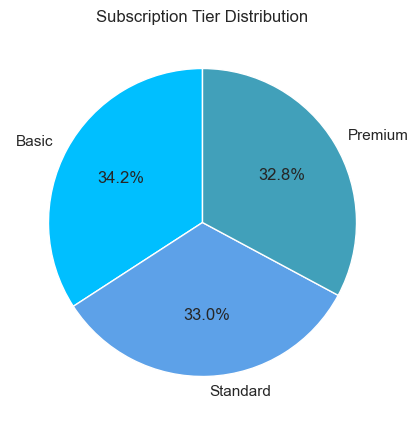

In [74]:
colors = ['#00BFFF', '#5DA1E8', '#41A0BA'] 
subscription_counts = df['Subscription_Tier'].value_counts()
subscription_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(5, 5), colors=colors)
plt.ylabel('')
plt.title('Subscription Tier Distribution')
plt.show()


In [27]:
df['Common_Keywords'].value_counts()

Common_Keywords
Affordable    2559
Stylish       2514
Innovative    2491
Durable       2436
Name: count, dtype: int64

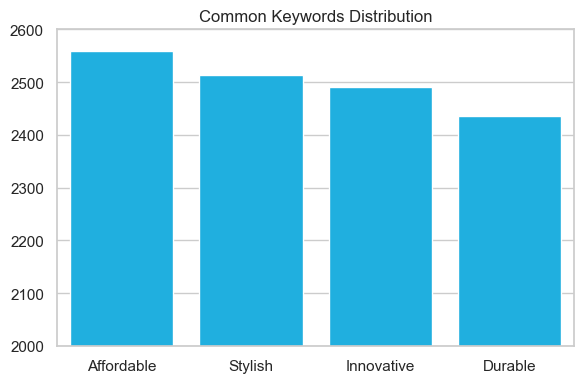

In [94]:
# Bar graph with the y-axis adjusted to focus on the differences
keywords_counts = df['Common_Keywords'].value_counts()
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=keywords_counts.index, y=keywords_counts.values, color='#00BFFF')
ax.set_ylim(2000, 2600)
plt.title('Common Keywords Distribution')
plt.xlabel('')
plt.tight_layout()
plt.show()


In [96]:
numerical_cols = ["Budget", "Clicks", "Conversions", "Revenue_Generated", "ROI", "Subscription_Length", "Discount_Level", 
                  "Units_Sold", "Bundle_Price"]

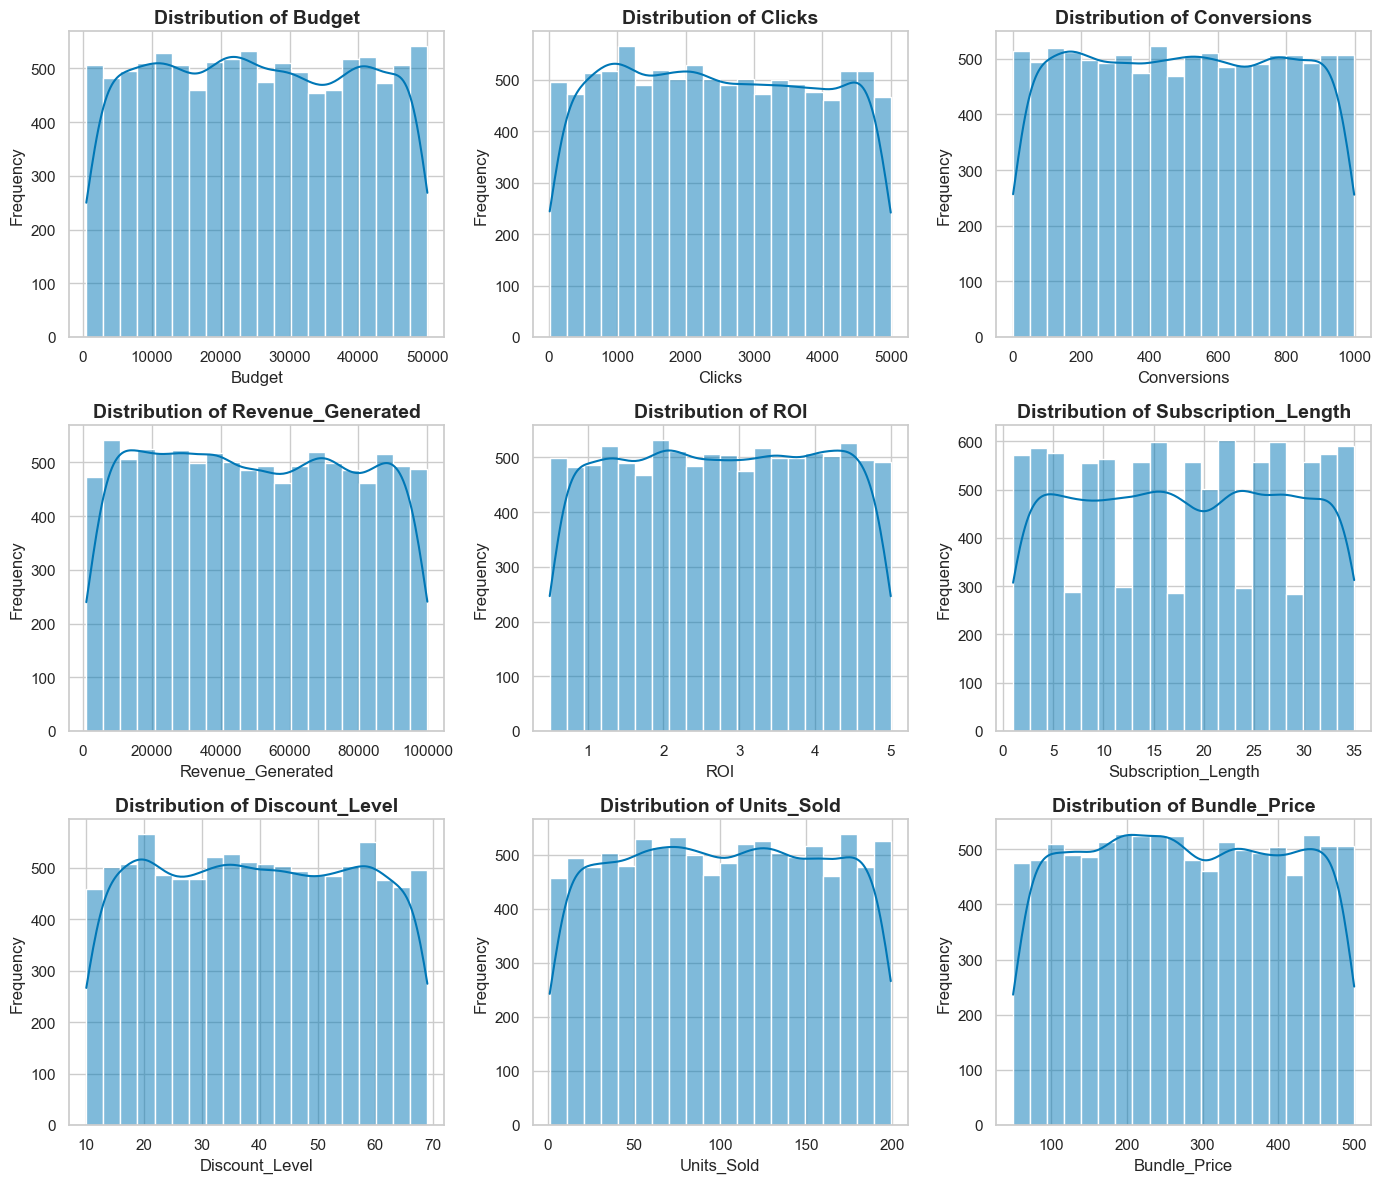

In [100]:
fig, axes = plt.subplots(3, 3, figsize=(14,12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color='#0077B6', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [45]:
df.groupby('Common_Keywords')[['ROI', 'Conversions', 'Revenue_Generated']].mean()

,ROI,Conversions,Revenue_Generated
Common_Keywords,,,
Affordable,2.757745,489.707698,50938.910727
Durable,2.767578,504.599343,50189.089581
Innovative,2.737499,507.700522,50411.772678
Stylish,2.762788,494.327367,48606.704566


In [142]:
df.groupby('Budget_Category', observed=False)[['ROI', 'Revenue_Generated', 'Conversions', 'Clicks', 'Subscription_Length', 'Units_Sold']].mean()

,ROI,Revenue_Generated,Conversions,Clicks,Subscription_Length,Units_Sold
Budget_Category,,,,,,
Low,2.718511,50563.717289,511.697431,2555.749345,18.191924,99.249082
Medium,2.744148,50846.495625,500.494815,2450.070318,18.287427,100.393390
High,2.763723,49523.658555,490.085345,2468.860252,17.741244,101.854471
Very High,2.799080,49080.300876,497.634076,2479.858180,17.841723,100.803485


## &nbsp;&nbsp;&nbsp;&nbsp; 3.2 Section Highlights

* The overall distributions of key numerical variables (budget, revenue, clicks, etc.) do not show significant skewness or extreme outliers. The data appears broadly uniform, consistent with the synthetic nature of the dataset.

* Subscription Tiers and Common Keywords are evenly distributed, suggesting balanced sampling across categories. This ensures no single group disproportionately influences the analysis.

* Initial groupings by Common Keywords and Budget Categories show only marginal differences in averages for ROI, conversions, and revenue. These early trends do not indicate strong relationships when these variables are examined in isolation.

* The absence of clear patterns at this stage highlights the need to investigate potential interaction effects between variables, such as the influence of discounts in combination with keywords or budget categories.

# 4. Focused Analysis & Insights

The goal of this section is to answer specific business questions related to marketing efficiency, customer behavior, and campaign strategy. 

Key areas of focus include evaluating the impact of budget levels, discount strategies, and campaign positioning on performance metrics such as ROI, revenue efficiency, and conversion effectiveness. Each subsection aims to generate actionable insights to inform marketing decisions.


## &nbsp;&nbsp;&nbsp;&nbsp; 4.1 Pricing Strategy Insights

In [138]:
df.groupby('Discount_Category', observed=False)[['ROI', 'Conversions', 'Clicks', 'Revenue_Generated', 'Subscription_Length', 'Units_Sold']].mean()


,ROI,Conversions,Clicks,Revenue_Generated,Subscription_Length,Units_Sold
Discount_Category,,,,,,
Low (0-20%),2.703532,497.148671,2460.172545,50133.262311,18.129137,100.800868
Medium (21-40%),2.771139,510.457237,2476.330144,49598.572656,17.973385,100.202153
High (41-60%),2.758981,487.347350,2493.454545,50514.190746,18.016879,100.336097
Very High (61-80%),2.783614,501.950557,2495.608635,49823.554485,17.971448,102.513231


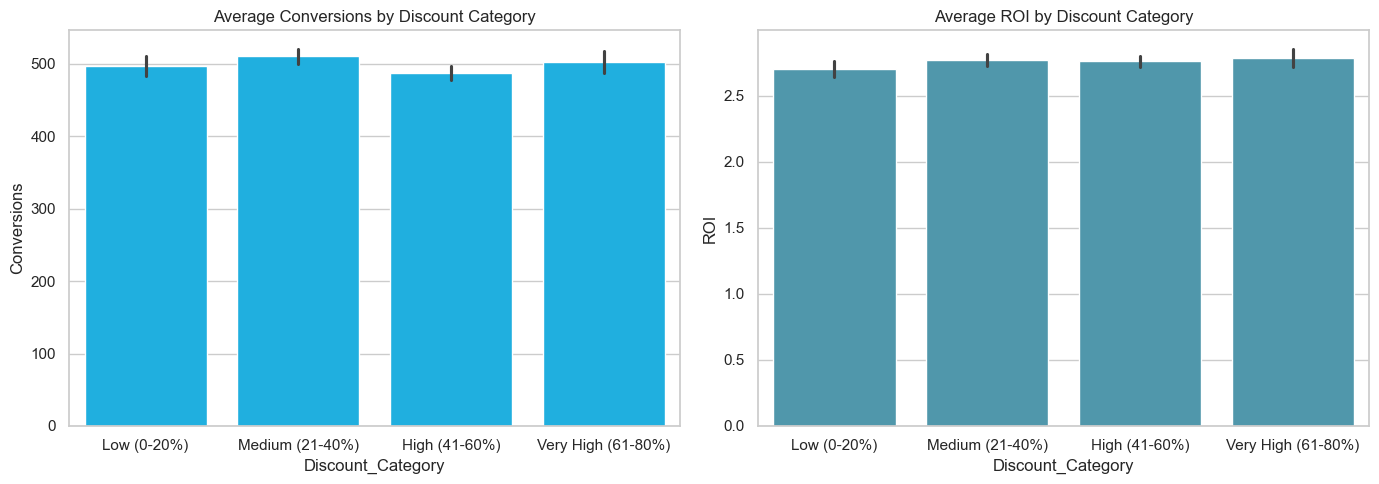

In [224]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=df, x='Discount_Category', y='Conversions', color='#00BFFF', ax=ax[0])
ax[0].set_title('Average Conversions by Discount Category')

sns.barplot(data=df, x='Discount_Category', y='ROI', color='#41A0BA', ax=ax[1])
ax[1].set_title('Average ROI by Discount Category')

plt.tight_layout()
plt.show()


In [156]:
df.groupby('Bundle_Price_Category', observed=False)[['ROI', 'Conversions', 'Clicks', 'Revenue_Generated', 'Subscription_Length', 'Units_Sold']].mean()

,ROI,Conversions,Clicks,Revenue_Generated,Subscription_Length,Units_Sold
Bundle_Price_Category,,,,,,
Low,2.706544,510.991814,2465.991360,50316.181733,18.038199,100.555707
Medium,2.782634,500.758712,2488.604843,50129.361636,17.924099,101.107797
High,2.734527,492.014506,2480.998791,49727.165138,17.921426,100.459655
Very High,2.840335,490.480108,2495.732369,50140.853725,18.540687,100.363472


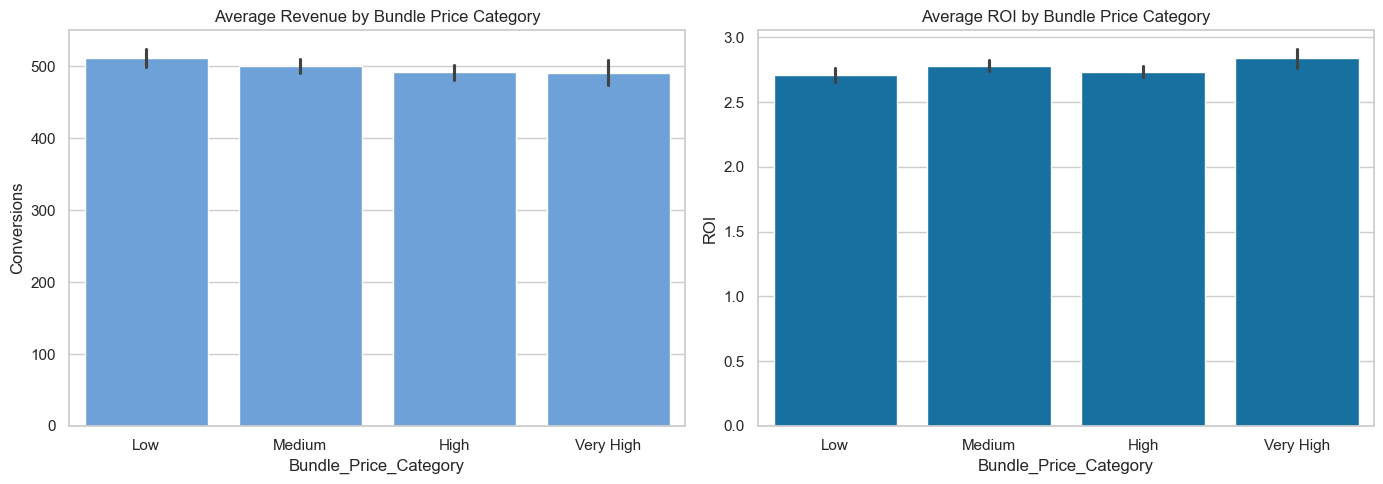

In [222]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=df, x='Bundle_Price_Category', y='Conversions', color='#5DA1E8', ax=ax[0])
ax[0].set_title('Average Revenue by Bundle Price Category')

sns.barplot(data=df, x='Bundle_Price_Category', y='ROI', color='#0077B6', ax=ax[1])
ax[1].set_title('Average ROI by Bundle Price Category')

plt.tight_layout()
plt.show()


In [120]:
df.groupby('Budget_Category', observed=False)['Revenue_per_Dollar'].mean()

Budget_Category
Low          15.844869
Medium        3.118005
High          1.552603
Very High     1.093281
Name: Revenue_per_Dollar, dtype: float64

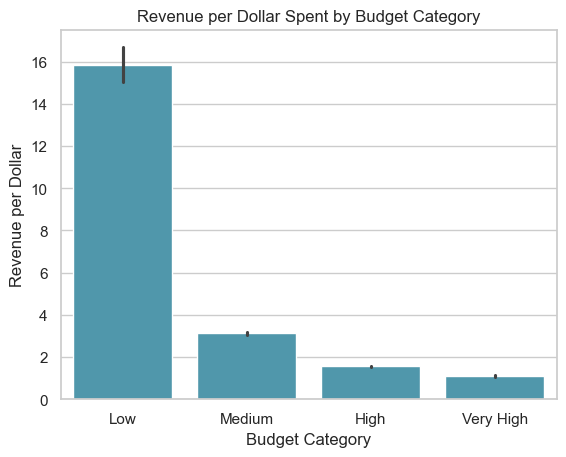

In [226]:
sns.barplot(data=df, x='Budget_Category', y='Revenue_per_Dollar', color='#41A0BA')
plt.title('Revenue per Dollar Spent by Budget Category')
plt.ylabel('Revenue per Dollar')
plt.xlabel('Budget Category')
plt.show()

In [128]:
df.groupby('Discount_Category', observed=False)['Revenue_per_Dollar'].mean()

Discount_Category
Low (0-20%)           4.491073
Medium (21-40%)       4.519401
High (41-60%)         4.885308
Very High (61-80%)    4.718416
Name: Revenue_per_Dollar, dtype: float64

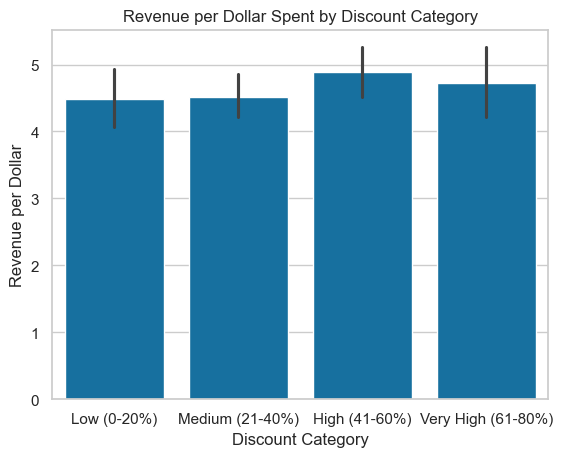

In [228]:
sns.barplot(data=df, x='Discount_Category', y='Revenue_per_Dollar', color='#0077B6')
plt.title('Revenue per Dollar Spent by Discount Category')
plt.xlabel('Discount Category')
plt.ylabel('Revenue per Dollar')
plt.show()

### &nbsp;&nbsp;&nbsp;&nbsp; 4.1.1 Highlights

* Conversions are slightly higher at the Medium (21-40%) discount level, but not by much.
* ROI slightly but gradually increases with the discount, peaking at Very High (61-80%).
* A significant difference emerges when analyzing revenue per dollar spent. The Low budget category achieves around 15.8 dollars per dollar spent, while Medium, High, and Very High categories produce substantially lower returns (around 1-3 dollars per dollar spent).
* Revenue per dollar spent is more stable across discount categories (around 4.4 to 4.9), with slightly higher efficiency in the High discount range (around 4.88).

## &nbsp;&nbsp;&nbsp;&nbsp; 4.2 Customer Segmentation Insights

In [141]:
df.groupby('Subscription_Tier', observed=False)[['ROI', 'Conversions', 'Revenue_Generated', 'Customer_Satisfaction_Post_Refund']].mean()

,ROI,Conversions,Revenue_Generated,Customer_Satisfaction_Post_Refund
Subscription_Tier,,,,
Basic,2.790805,503.757611,50157.918235,2.501756
Premium,2.739385,500.584957,50093.139802,2.476553
Standard,2.737612,492.433333,49860.895755,2.524242


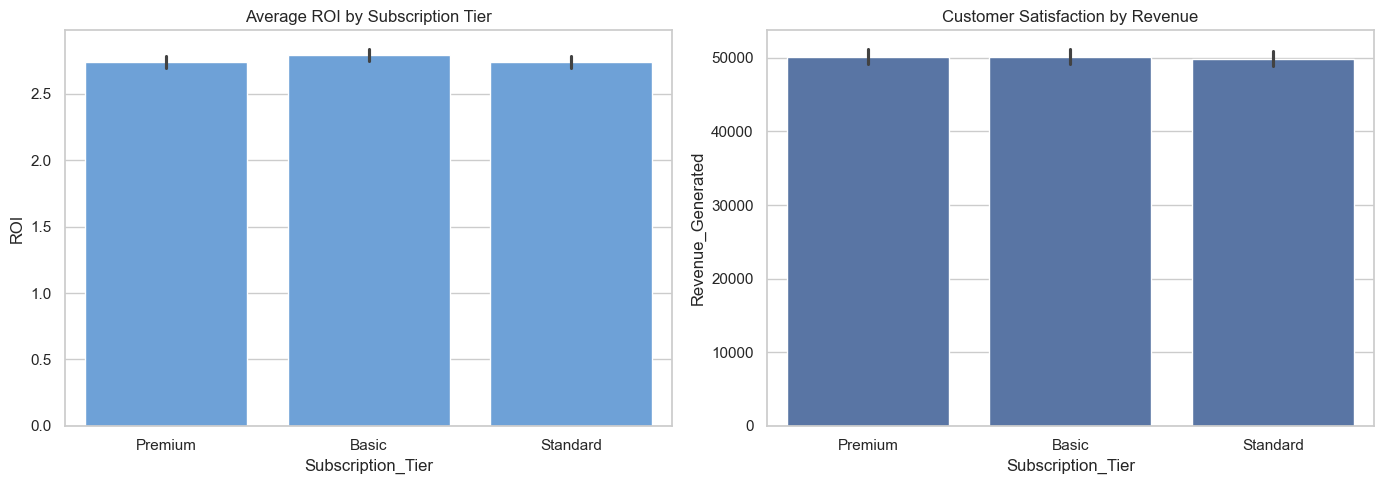

In [260]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=df, x='Subscription_Tier', y='ROI', color='#5DA1E8', ax=ax[0])
ax[0].set_title('Average ROI by Subscription Tier')

sns.barplot(data=df, x='Subscription_Tier', y='Revenue_Generated', ax=ax[1])
ax[1].set_title('Customer Satisfaction by Revenue')

plt.tight_layout()
plt.show()


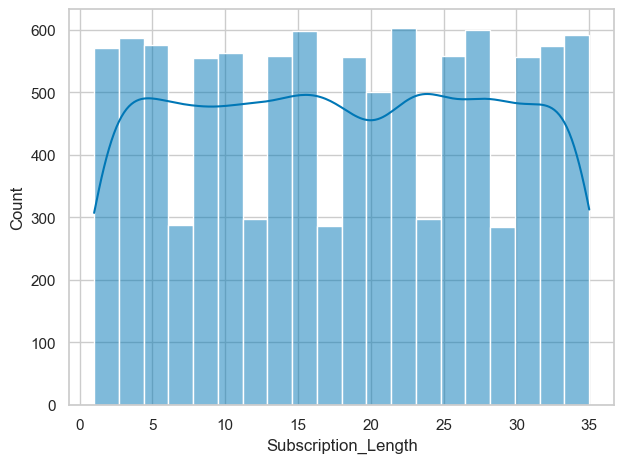

In [256]:
sns.histplot(df['Subscription_Length'], bins=20, kde=True, color='#0077B6')

plt.tight_layout()
plt.show()

In [169]:
df.groupby('Subscription_Tier')['Subscription_Length'].mean()


Subscription_Tier
Basic       18.094555
Premium     18.036845
Standard    17.915455
Name: Subscription_Length, dtype: float64

### &nbsp;&nbsp;&nbsp;&nbsp; 4.2.1 Highlights

Subscription tier and subscription length are not strong differentiators in terms of ROI, revenue, or customer satisfaction within this dataset. These factors appear relatively stable and interchangeable.

## 4.3 Keyword Positioning Insights

We want to explore how different positioning strategies (represented by campaign keywords "Affordable," "Durable," "Innovative," and "Stylish") interact with discount levels to impact key performance outcomes, including ROI, revenue generation, units sold, and revenue efficiency.



In [83]:
df.groupby('Common_Keywords')[['ROI', 'Conversions', 'Revenue_Generated', 'Units_Sold', 'Revenue_per_Dollar', 'Customer_Satisfaction_Post_Refund']].mean()


,ROI,Conversions,Revenue_Generated,Units_Sold,Revenue_per_Dollar,Customer_Satisfaction_Post_Refund
Common_Keywords,,,,,,
Affordable,2.757745,489.707698,50938.910727,100.731927,4.832755,2.484174
Durable,2.767578,504.599343,50189.089581,99.546388,4.537358,2.515599
Innovative,2.737499,507.700522,50411.772678,102.769570,4.766126,2.483741
Stylish,2.762788,494.327367,48606.704566,99.693317,4.522994,2.520684


In [64]:
# Units sold and revenue generated broken down by Discount Category
df.groupby(['Common_Keywords', 'Discount_Category'], observed=False)[['Units_Sold', 'Revenue_Generated']].mean().unstack()

Units_Sold                                \
Discount_Category Low (0-20%) Medium (21-40%) High (41-60%)   
Common_Keywords                                               
Affordable         103.183932      100.619668     99.208716   
Durable             97.612613       99.071339     99.462341   
Innovative         103.214128      100.666667    103.494131   
Stylish             99.099366      100.395692     99.129114   

                                     Revenue_Generated                  \
Discount_Category Very High (61-80%)       Low (0-20%) Medium (21-40%)   
Common_Keywords                                                          
Affordable                101.443243      50471.577590    49491.352073   
Durable                   103.518182      51215.052905    50015.954606   
Innovative                105.231608      50534.565673    51262.331465   
Stylish                    99.983740      48395.146934    47778.150351   

                                                    
Discount_Category High (41-60%) Very High (61-80%)  
Common_Keywords                                     
Affordable         53172.622397       49574.022892  
Durable            50358.643105       48784.490909  
Innovative         49320.046643       50896.562071  
Stylish            49037.603392       49935.814336

In [79]:
print('ROI by Keyword and Discount Level')
print(' ')
df.groupby(['Common_Keywords', 'Discount_Category'], observed=False)['ROI'].mean().unstack()

ROI by Keyword and Discount Level
 


Discount_Category,Low (0-20%),Medium (21-40%),High (41-60%),Very High (61-80%)
Common_Keywords,,,,
Affordable,2.659112,2.788969,2.796422,2.721459
Durable,2.715045,2.726533,2.752700,2.976545
Innovative,2.675938,2.748523,2.755376,2.747384
Stylish,2.763573,2.815488,2.728405,2.709431


In [81]:
print('Revenue per Dollar by Keyword and Discount Level')
print(' ')
df.groupby(['Common_Keywords', 'Discount_Category'], observed=False)['Revenue_per_Dollar'].mean().unstack()

Revenue per Dollar by Keyword and Discount Level
 


Discount_Category,Low (0-20%),Medium (21-40%),High (41-60%),Very High (61-80%)
Common_Keywords,,,,
Affordable,4.418344,4.447022,5.315330,5.105108
Durable,4.748911,4.445342,4.678613,4.106111
Innovative,4.002561,4.879706,4.908123,5.125503
Stylish,4.789628,4.321181,4.611838,4.473385


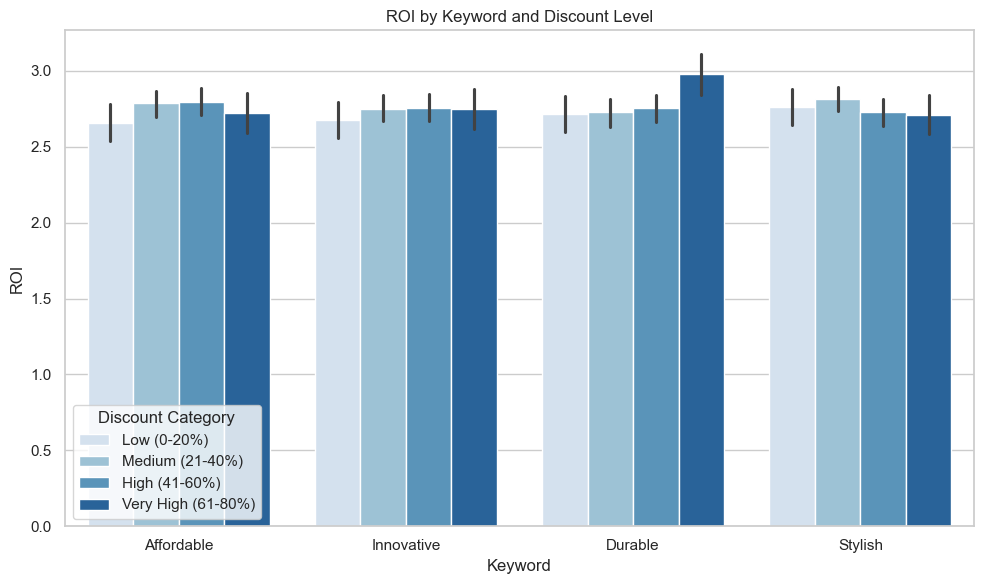

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Common_Keywords', y='ROI', hue='Discount_Category', palette='Blues')
plt.title('ROI by Keyword and Discount Level')
plt.ylabel('ROI')
plt.xlabel('Keyword')
plt.legend(title='Discount Category')
plt.tight_layout()
plt.show()


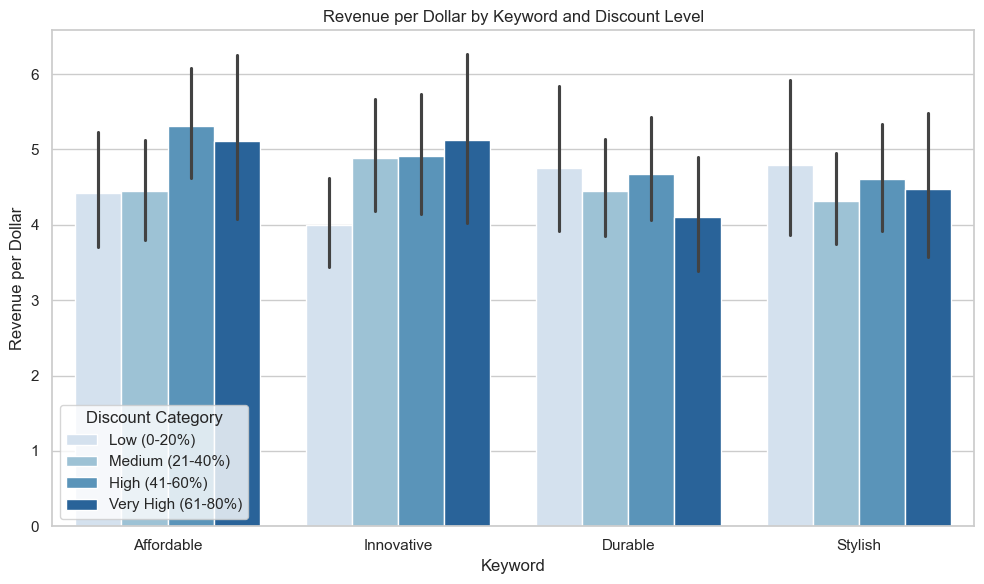

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Common_Keywords', y='Revenue_per_Dollar', hue='Discount_Category', palette='Blues')
plt.title('Revenue per Dollar by Keyword and Discount Level')
plt.ylabel('Revenue per Dollar')
plt.xlabel('Keyword')
plt.legend(title='Discount Category')
plt.tight_layout()
plt.show()


### &nbsp;&nbsp;&nbsp;&nbsp; 4.3.1 Preliminary Findings

* Campaings emphasizing the word 'Durable' paired with Very High (61–80%) discounts achieved the highest ROI of all combinations. While this suggests aggressive discounting can drive efficient short-term gains in profit relative to spend, it also resulted in the lowest revenue per dollar spent, indicating that this strategy maximizes ROI through cost management rather than driving substantial new revenue.
* Campaings emphasizing the word 'Affordable' performed consistently well across discounts but achieved its highest Revenue per Dollar at High (41–60%) discounts, suggesting this tier balances volume and efficiency most effectively.
* Campaings emphasizing the word 'Innovative' improves its Revenue per Dollar as discounts increase, peaking at Very High (61-80%) discounts, but ROI remains stable without standout performance.
* Campaings emphasizing the word 'Stylish' delivered consistent but unremarkable performance across discounts, suggesting less price sensitivity but also less potential for optimization via discounts.
* Overall, ROI for keywords other than Durable tends to fluctuate less, indicating that Durable may be more sensitive to deeper discounting strategies.
* Units Sold remains relatively uniform across combinations, confirming that volume alone does not drive performance variation here.


## 4.4 Campaign Engagement Efficiency Insights

Analyze whether higher clicks actually lead to better conversions and revenue efficiency. This ties to ROI because wasted clicks reduce efficiency.

We want to explore:
* Clicks vs. Conversions ratio by keyword and discount.
* Whether campaigns with more clicks tend to produce higher ROI or just burn budget.
* Are we getting quality clicks, or just volume?

In [117]:
df.groupby(['Budget_Category', 'Common_Keywords'], observed=False)[['Clicks', 'Conversions', 'Conversion_Rate', 'ROI', 'Revenue_per_Dollar']].mean()

Clicks  Conversions  Conversion_Rate  \
Budget_Category Common_Keywords                                              
Low             Affordable       2593.194779   512.644578         0.591211   
                Durable          2612.215983   519.615551         0.645439   
                Innovative       2550.922607   520.144603         0.538550   
                Stylish          2462.514286   493.487912         0.428062   
Medium          Affordable       2437.308483   490.831620         0.618433   
                Durable          2473.936658   503.855795         0.554292   
                Innovative       2470.313984   497.633245         0.537461   
                Stylish          2421.450495   509.397277         0.619626   
High            Affordable       2469.478261   467.683794         0.715351   
                Durable          2549.414427   502.230552         0.629810   
                Innovative       2412.096386   507.847390         0.648043   
                Stylish          2448.230769   483.420330         0.727737   
Very High       Affordable       2484.881679   498.141221         0.525200   
                Durable          2483.104962   495.580153         0.558838   
                Innovative       2501.195960   510.551515         0.690133   
                Stylish          2451.376673   486.957935         0.636490   

                                      ROI  Revenue_per_Dollar  
Budget_Category Common_Keywords                                
Low             Affordable       2.725181           16.299097  
                Durable          2.782527           15.132677  
                Innovative       2.682811           15.897383  
                Stylish          2.684593           16.015761  
Medium          Affordable       2.727828            3.143134  
                Durable          2.765391            3.195923  
                Innovative       2.720106            3.092725  
                Stylish          2.762908            3.045972  
High            Affordable       2.802899            1.634699  
                Durable          2.734017            1.521591  
                Innovative       2.745823            1.554790  
                Stylish          2.770096            1.494882  
Very High       Affordable       2.767710            1.076289  
                Durable          2.802748            1.143961  
                Innovative       2.805818            1.133517  
                Stylish          2.820459            1.021446

In [131]:
df.groupby(['Budget_Category', 'Common_Keywords', 'Discount_Category'], observed=False)[['Conversion_Rate']].mean().unstack()

Conversion_Rate                                \
Discount_Category                   Low (0-20%) Medium (21-40%) High (41-60%)   
Budget_Category Common_Keywords                                                 
Low             Affordable             0.834419        0.389541      0.646371   
                Durable                0.479804        0.551163      0.799625   
                Innovative             0.567428        0.626585      0.541969   
                Stylish                0.372062        0.448560      0.404478   
Medium          Affordable             0.526590        0.534072      0.720024   
                Durable                0.517144        0.702639      0.466884   
                Innovative             0.686418        0.601695      0.467212   
                Stylish                0.458036        0.549868      0.750570   
High            Affordable             0.718012        1.114355      0.401219   
                Durable                1.370745        0.364930      0.553037   
                Innovative             0.689040        0.679493      0.614458   
                Stylish                0.707377        0.762551      0.738967   
Very High       Affordable             0.523689        0.655879      0.461657   
                Durable                0.439575        0.588075      0.669515   
                Innovative             0.673656        0.733136      0.709223   
                Stylish                0.405877        0.688894      0.820432   

                                                    
Discount_Category               Very High (61-80%)  
Budget_Category Common_Keywords                     
Low             Affordable                0.606741  
                Durable                   0.680540  
                Innovative                0.268089  
                Stylish                   0.510464  
Medium          Affordable                0.719154  
                Durable                   0.484657  
                Innovative                0.413499  
                Stylish                   0.695258  
High            Affordable                0.549583  
                Durable                   0.500739  
                Innovative                0.596077  
                Stylish                   0.637095  
Very High       Affordable                0.384475  
                Durable                   0.381797  
                Innovative                0.579188  
                Stylish                   0.444075

In [133]:
df.groupby(['Budget_Category', 'Common_Keywords', 'Discount_Category'], observed=False)[['ROI']].mean().unstack()

ROI                                \
Discount_Category               Low (0-20%) Medium (21-40%) High (41-60%)   
Budget_Category Common_Keywords                                             
Low             Affordable         2.634568        2.891548      2.594656   
                Durable            2.609167        2.743826      2.794731   
                Innovative         2.425051        2.850122      2.650926   
                Stylish            2.530737        2.838535      2.670072   
Medium          Affordable         2.516304        2.669288      2.928583   
                Durable            2.740692        2.764042      2.747080   
                Innovative         2.571638        2.707283      2.743852   
                Stylish            2.857815        2.720876      2.706616   
High            Affordable         2.656554        2.833621      2.878694   
                Durable            2.729685        2.756525      2.651469   
                Innovative         2.833034        2.669360      2.755328   
                Stylish            2.801120        2.819926      2.765022   
Very High       Affordable         2.867358        2.830667      2.711685   
                Durable            2.750971        2.619310      2.861864   
                Innovative         2.828172        2.838609      2.869261   
                Stylish            2.794902        2.932099      2.762125   

                                                    
Discount_Category               Very High (61-80%)  
Budget_Category Common_Keywords                     
Low             Affordable                2.810411  
                Durable                   3.072857  
                Innovative                2.731970  
                Stylish                   2.568462  
Medium          Affordable                2.676857  
                Durable                   2.852653  
                Innovative                2.839322  
                Stylish                   2.862833  
High            Affordable                2.767317  
                Durable                   2.890202  
                Innovative                2.784259  
                Stylish                   2.614615  
Very High       Affordable                2.613478  
                Durable                   3.185429  
                Innovative                2.563200  
                Stylish                   2.717125

### &nbsp;&nbsp;&nbsp;&nbsp; 4.4.1 Preliminary Findings
* Low-budget campaigns significantly outperform higher-budget ones in terms of revenue generated per dollar spent, confirming previous observations from Section 4.1.
* Conversion Rates are inconsistent across combinations of budget, keywords, and discount categories. Some notably high conversion rates appear in smaller, less predictable segments (e.g., Durable with Low Budget & High Discount at 1.37, or Affordable with Medium Budget & High Discount at 1.11). However, these are exceptions rather than trends.
* ROI remains relatively stable, with some standout combinations. Durable again shows stronger performance at high discounts even within higher budget categories (e.g., Durable with Very High Budget and Very High Discount reaches ROI 3.18).
* Across budget categories and keywords, Clicks and Conversions are relatively stable, indicating that the differences in ROI and efficiency are not primarily driven by sheer volume but by how efficiently budgets convert into value.

# 5. Conclusion & Recommendations

## &nbsp;&nbsp;&nbsp;&nbsp; 5.1 Key Findings

* **Budget Efficiency Outweighs Discount Depth:** Smaller budget campaigns consistently deliver higher revenue per dollar spent, making them the most efficient within this dataset. Larger budgets exhibit diminishing returns in efficiency.

* **Discount Levels Yield Marginal Differences:** Varying discount levels show minimal impact on conversions, ROI, and revenue efficiency. Deeper discounts do not materially outperform moderate ones.

* **Higher Bundle Pricing Correlates with Slight ROI Gains:** Higher-priced bundles are associated with marginally better ROI, though conversions and revenue remain stable across price tiers.

* **Durable Positioning Responds Well to Deep Discounting:** Campaigns focused on Durable keywords deliver the highest ROI under aggressive discount strategies.

* **Affordable Positioning Maximizes Efficiency at Mid-High Discounts:** Affordable positioning performs best in revenue efficiency at discount levels between 41–60%.

* **Innovative Positioning Gains Efficiency but Not ROI:** Innovative positioning improves revenue per dollar at higher discounts but shows no corresponding uplift in ROI, suggesting diminishing returns despite efficiency gains.

* **Stylish Positioning Prefers Minimal Discounts:** Stylish campaigns perform best without heavy discounting, indicating this positioning may be more aligned with brand perception than price sensitivity.

* **Budget and Efficiency Are Not Linear:** Higher budgets do not improve efficiency; smaller budgets continue to outperform in revenue per dollar across categories.

* **Conversion Efficiencies Are Contextual:** Certain niche combinations of keyword and discount levels yield unusually high conversion rates within specific budget categories. These findings suggest opportunities for targeted micro-strategies rather than broad changes.

* **Clicks and Conversions Do Not Guarantee Efficiency:** Similar engagement volumes can yield varying ROI and revenue efficiency, reinforcing the need for a holistic approach to campaign evaluation beyond surface metrics.


---


## &nbsp;&nbsp;&nbsp;&nbsp; 5.2 Recommended Actions
* **Prioritize Smaller, Targeted Campaigns:** Reallocate budget toward smaller, more targeted campaigns where efficiency per dollar is proven higher.

* **Refine Discounting Strategies:** Avoid blanket deep discounting. Instead, apply higher discounts strategically to Durable and Affordable segments where clear ROI gains have been identified.

* **Reframe Positioning Tactics:** For Stylish and Innovative campaigns, emphasize brand-driven strategies rather than relying on discounts to drive results.

* **Optimize Budget Allocation by Segment:** Tailor budget size and pricing strategy by positioning segment rather than applying uniform policies across campaigns.

* **Adopt Holistic Performance Measures:** Supplement engagement metrics (Clicks, Conversions) with efficiency metrics (Revenue per Dollar, ROI) when evaluating campaign success.

* **Test Micro-Strategies:** Explore focused A/B testing on niche combinations (e.g., Durable + Very High Discounts under Low Budgets) to validate or refine micro-strategies suggested by this analysis.


---


## &nbsp;&nbsp;&nbsp;&nbsp; 5.3 Limitations & Considerations
* **Synthetic Dataset:** The analysis is based on synthetic data, which, while well-structured, may not fully capture real-world complexities or consumer behavior patterns.
  
* **Lack of Campaign Execution Details:** Insights are limited to available quantitative metrics. The dataset lacks details on campaign content, channels, or creative execution, which are critical to fully understanding drivers of success.

* **Generalizability:** Findings provide directional guidance but should be validated with real data before implementing significant strategic changes. Further testing with actual performance data is recommended to confirm these patterns.